In [1]:
import os
import re

import numpy as np
import pandas as pd
import xarray as xr
from scipy.signal import butter, filtfilt, welch

import matplotlib.pyplot as plt
# 设置全局的图表大小
plt.rcParams['figure.figsize'] = (25, 6)  # 宽度10英寸，高度6英寸
# time
tl1 = ['2016-03-11 06:47:05','2016-03-11 06:47:24']
tl2 = ['2016-03-11 06:47:35','2016-03-11 06:47:54']
tl3 = ['2016-03-11 06:48:25','2016-03-11 06:48:44']
tl4 = ['2016-03-11 06:47:55','2016-03-11 06:48:14']
tl5 = ['2016-03-11 06:48:15','2016-03-11 06:48:59']
tl6 = ['2016-03-11 06:47:00','2016-03-11 06:47:29']

fs_E = 16
fs_B = 50
window_size_E= 20 * fs_E
window_size_B= 20 * fs_B

# B

In [3]:
dir = 'data/Swarm'
fn = r'B_60_20160311.nc'
data_B = pd.read_csv(os.path.join(dir,fn))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

In [2]:
# B component
data_B = xr.open_dataset('data/Swarm/B_60_20160311.nc')
def return_B_component(col=1,str_='E'):
    B = data_B['B_NEC'][:, col]  # E
    # B = data_B['B_NEC'][:,0]  # N
    B = B.to_dataframe()
    B.drop(columns=['NEC'], inplace=True)
    B.rename(columns={'B_NEC': str_}, inplace=True)
    B = B[str_]
    B = B['2016-03-11 06:46:40':'2016-03-11 06:48:59']
    return B

B = return_B_component()

<Axes: xlabel='Timestamp'>

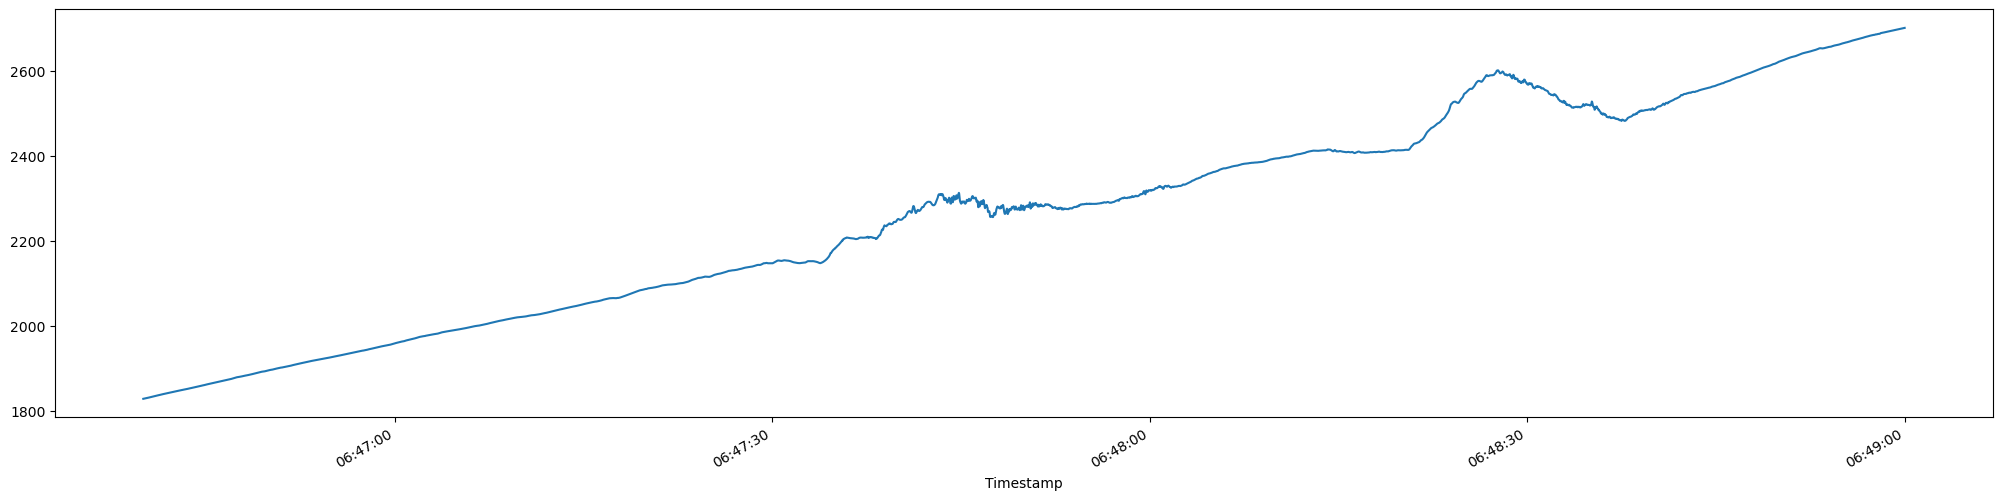

In [3]:
B.plot()

In [4]:
B.index

DatetimeIndex(['2016-03-11 06:46:40.019898368',
               '2016-03-11 06:46:40.039843840',
               '2016-03-11 06:46:40.059843840',
               '2016-03-11 06:46:40.079843840',
               '2016-03-11 06:46:40.099843840',
               '2016-03-11 06:46:40.119843840',
               '2016-03-11 06:46:40.139843584',
               '2016-03-11 06:46:40.159843584',
               '2016-03-11 06:46:40.179843584',
               '2016-03-11 06:46:40.199843584',
               ...
               '2016-03-11 06:48:59.812296960',
               '2016-03-11 06:48:59.832296960',
               '2016-03-11 06:48:59.852296704',
               '2016-03-11 06:48:59.872296704',
               '2016-03-11 06:48:59.892296704',
               '2016-03-11 06:48:59.912296704',
               '2016-03-11 06:48:59.932296960',
               '2016-03-11 06:48:59.952296960',
               '2016-03-11 06:48:59.972296960',
               '2016-03-11 06:48:59.992296960'],
              dtype=

In [3]:
# dir = 'data/Swarm/SW_MAGx_HR_1B/A'
# fn = 'SW_MAGA_HR_1B_20240812T040000_20240812T050000_1.csv'
# data_B = pd.read_csv(os.path.join(dir,fn))

In [4]:
# BN = []
# BE = []
# BC = []
# for b_nec_str in data_B['B_NEC']:
#     # 使用正则表达式去除方括号，并将字符串转换为浮点数列表
#     b_nec_values = [float(x) for x in re.findall(r"[-+]?\d*\.\d+|\d+", b_nec_str)]
#     BN.append(b_nec_values[0])
#     BE.append(b_nec_values[1])
#     BC.append(b_nec_values[2])
# BN = pd.Series(data=BN, index=data_B['Timestamp'],name='N')
# BE = pd.Series(data=BE, index=data_B['Timestamp'],name='E')
# BC = pd.Series(data=BC, index=data_B['Timestamp'],name='C')

In [5]:
B = BE

## mov ave, b, baselined

In [6]:
# moving average
# BE_mov_ave = np.convolve(BE, np.ones(window_size)/window_size, mode=mode)
# BE_mov_ave = BE.rolling(window=window_size,min_periods=1,center=True).mean()
B_mov_ave = B.rolling(window=window_size_B).mean()
plt.figure()
plt.plot(B.index, B)
plt.plot(B_mov_ave.index, B_mov_ave)
# plt.legend()
plt.xlabel('Time (UTC)')
plt.ylabel('B (nT)')
plt.title('B-component before and after moving average comparison')
# plt.savefig(f'B_{B_c_s} before and after moving average comparison')

# perturbation of B
b = B - B_mov_ave
b = b['2016-03-11 06:47:00':]
plt.figure()
plt.plot(b.index, b)
plt.plot(b.index, b-b.mean())
b = b-b.mean()
# plt.legend()
plt.xlabel('Time (UTC)')
plt.ylabel('\\Delta B and \\Delta B after Baselined (nT)')
plt.title('B-component perturbation before and after baseline comparison')
# plt.savefig(f'b_{B_c_s} before and after baseline comparison')
# plt.close()

Text(0.5, 1.0, 'B-component perturbation before and after baseline comparison')

Error in callback <function _draw_all_if_interactive at 0x000002141C400EA0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000021421914400> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



# E

In [7]:
# data_E = xr.open_dataset('data/Swarm/E_16_20160311.nc')
# data_E = data_E.sel(Timestamp=slice('2016-03-11 06:46:40','2016-03-11 06:48:59'))
# VsatN = data_E['VsatN']
# VsatE = data_E['VsatE']
# VsatC = data_E['VsatC']
# Ex = data_E['Ehx']
# Ey = data_E['Ehy']

In [8]:
# Ex = Ex.to_dataframe()
# Ey = Ey.to_dataframe()
# Ex = Ex['Ehx']
# Ey = Ey['Ehy']
# Ex.plot()
# Ey.plot()

In [9]:
dir = 'data/Swarm/SW_EFIx_TCT16/A'
fn = 'SW_EFIA_TCT16_20240812T000000_20240813T000000_1.csv'
data_E = pd.read_csv(os.path.join(dir,fn))
data_E.set_index('Timestamp',inplace=True)
data_E = data_E['2024-08-12 04:00:00.0':'2024-08-12 05:00:00.0']


KeyboardInterrupt



In [12]:
Ex = (data_E['Ehx'] + data_E['Evx']) / 2
Ey = (data_E['Ehy'] + data_E['Evy']) / 2
VsatN = data_E['VsatN']
VsatE = data_E['VsatE']
VsatC = data_E['VsatC']

(<Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>)

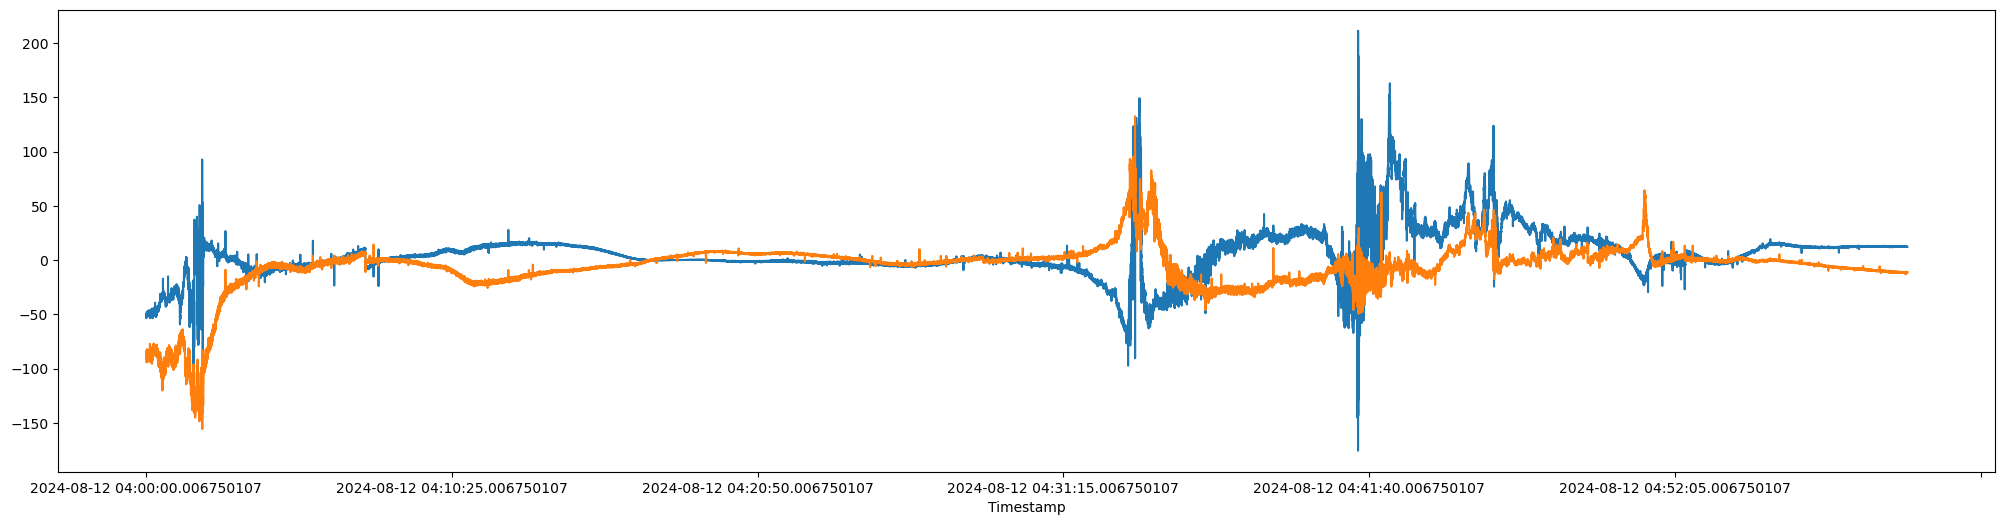

In [9]:
Ex.plot(),Ey.plot()

## set outliers as Nan

<Axes: xlabel='Timestamp'>

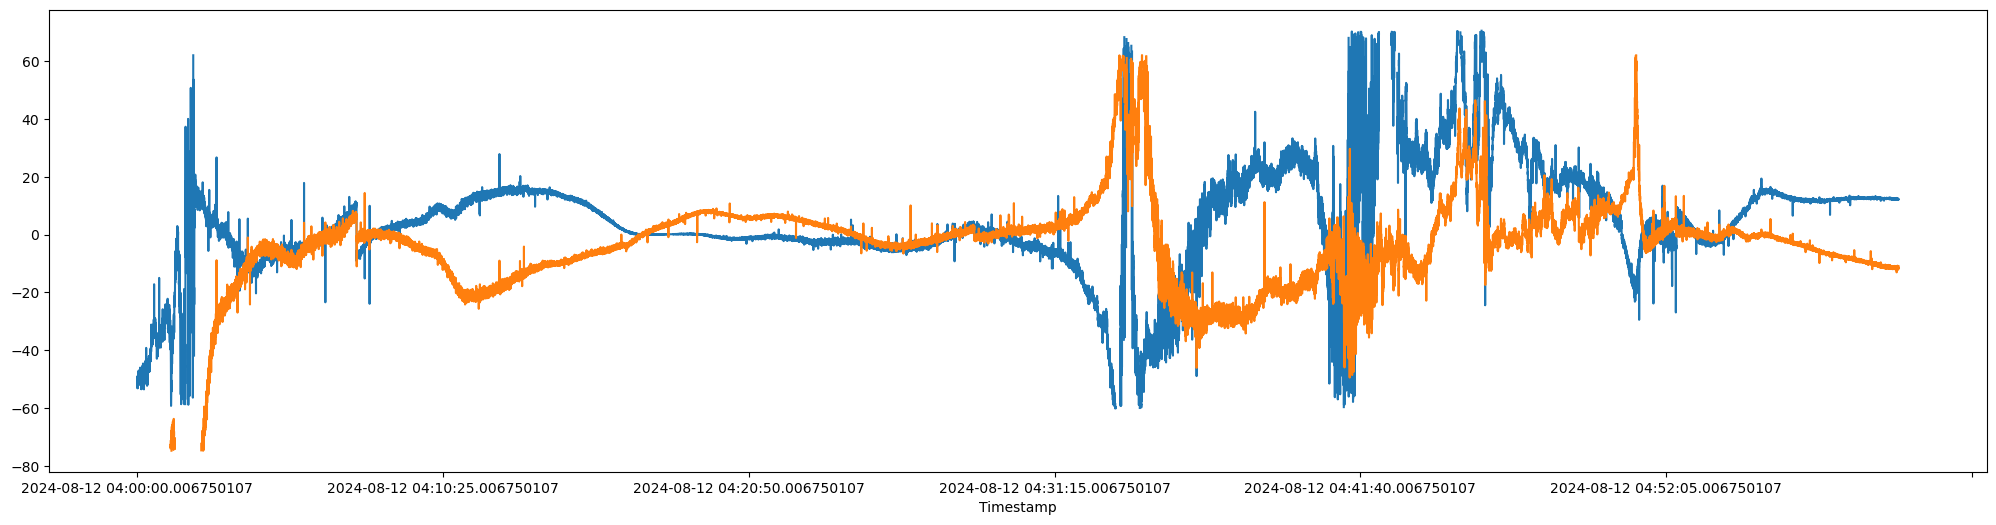

In [13]:
def set_outliers_nan(series):
    series_scores = (series - series.mean()) / series.std()
    # 设置阈值，通常 Z 分数大于 3 或小于 -3 的点可以认为是异常点，超过的设置为nan
    threshold = 3
    series[np.abs(series_scores) > threshold] = np.nan
    return series
Ex = set_outliers_nan(Ex)
Ey = set_outliers_nan(Ey)
Ex.plot()
Ey.plot()

## SC to NEU

In [7]:
# VsatN = VsatN.to_dataframe()
# VsatE = VsatE.to_dataframe()
# VsatC = VsatC.to_dataframe()
# VsatN = VsatN['VsatN']
# VsatE = VsatE['VsatE']
# VsatC = VsatC['VsatC']

In [8]:
theta = np.arccos(VsatN**2 / (np.abs(VsatN) * np.sqrt(VsatN**2 + VsatE**2)))
EN = Ex * np.cos(theta) - Ey * np.sin(theta)
EE = Ey * np.cos(theta) + Ex * np.sin(theta)

In [9]:
# VsatN = VsatN.to_dataframe()
# VsatE = VsatE.to_dataframe()
# VsatC = VsatC.to_dataframe()
# VsatN = VsatN['VsatN']
# VsatE = VsatE['VsatE']
# VsatC = VsatC['VsatC']
# 
# # 考虑卫星垂直方向的分量
# theta_vz = np.arctan(VsatC/np.sqrt(VsatN**2 + VsatE**2))
# Ex = Ex*np.cos(theta_vz)
# E = np.sqrt(Ex**2 + Ey**2)  # 此处会失去正负号信息！！！
# theta_v = np.arctan(VsatN/VsatE)
# theta_se = np.arctan(Ey/Ex)
# EE = E * np.cos(theta_v+theta_se)
# EN = E * np.sin(theta_v+theta_se)

Text(0.5, 1.0, 'E_component')

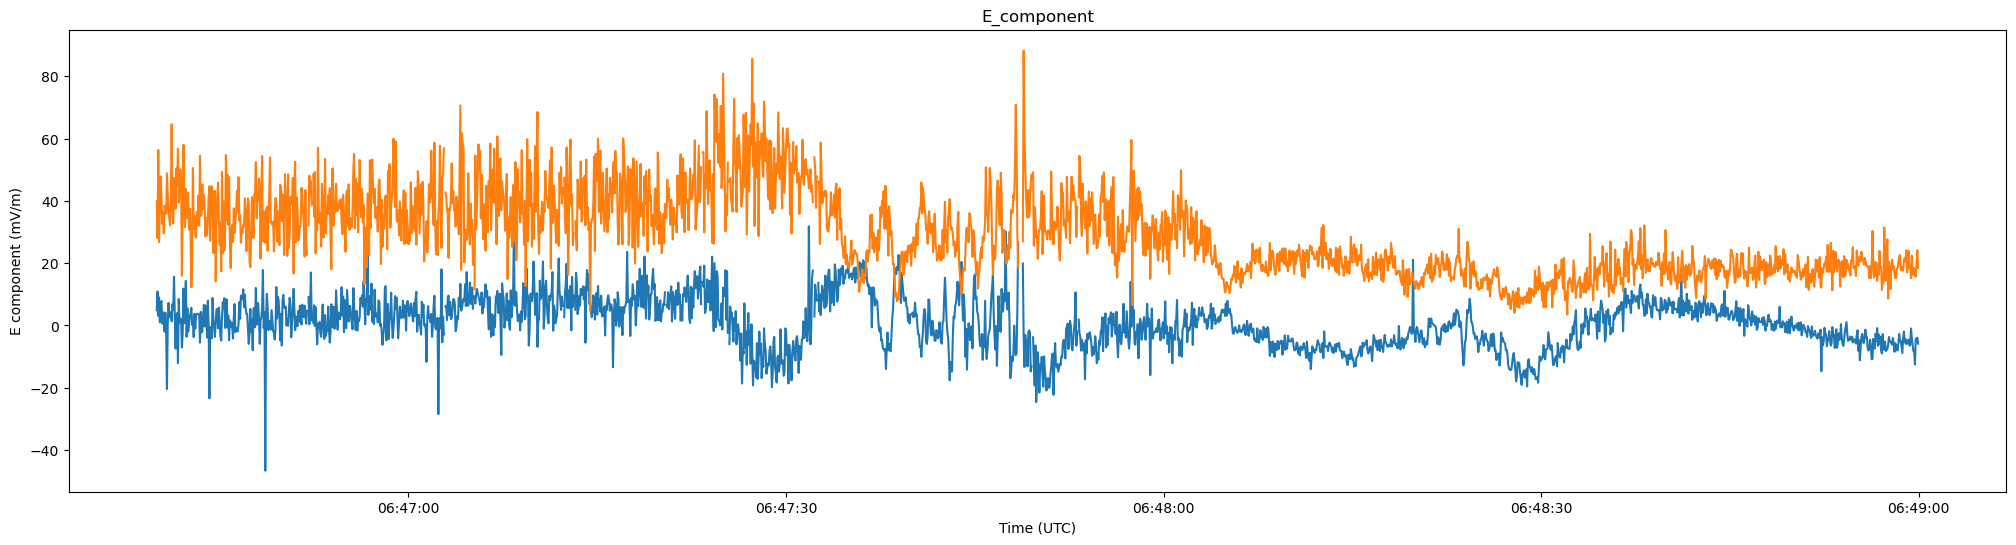

In [10]:
plt.figure()
plt.plot(EN.index, EN)
plt.plot(EE.index, EE)
# plt.legend()
plt.xlabel('Time (UTC)')
plt.ylabel('E component (mV/m)')
plt.title('E_component')
# plt.savefig(f'E_component')
# plt.close()

## mov ave

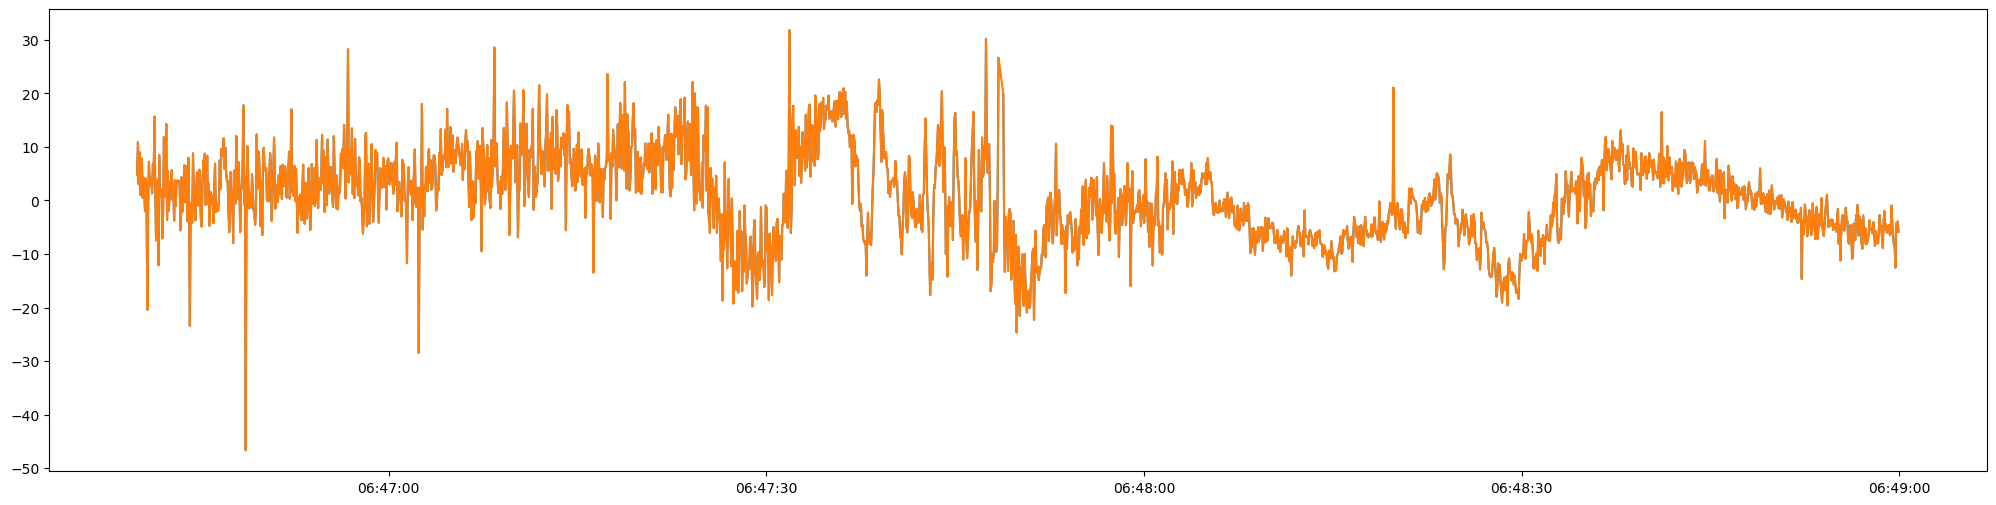

In [11]:
# 线性插值并填充剩余的 NaN
E = EN
E_interpolated = E.interpolate(method='linear').bfill().ffill()

# 绘制去除异常值后的数据
plt.plot(E)
plt.plot(E_interpolated)

In [12]:
E_mov_ave = E_interpolated.rolling(window=window_size_E).mean()

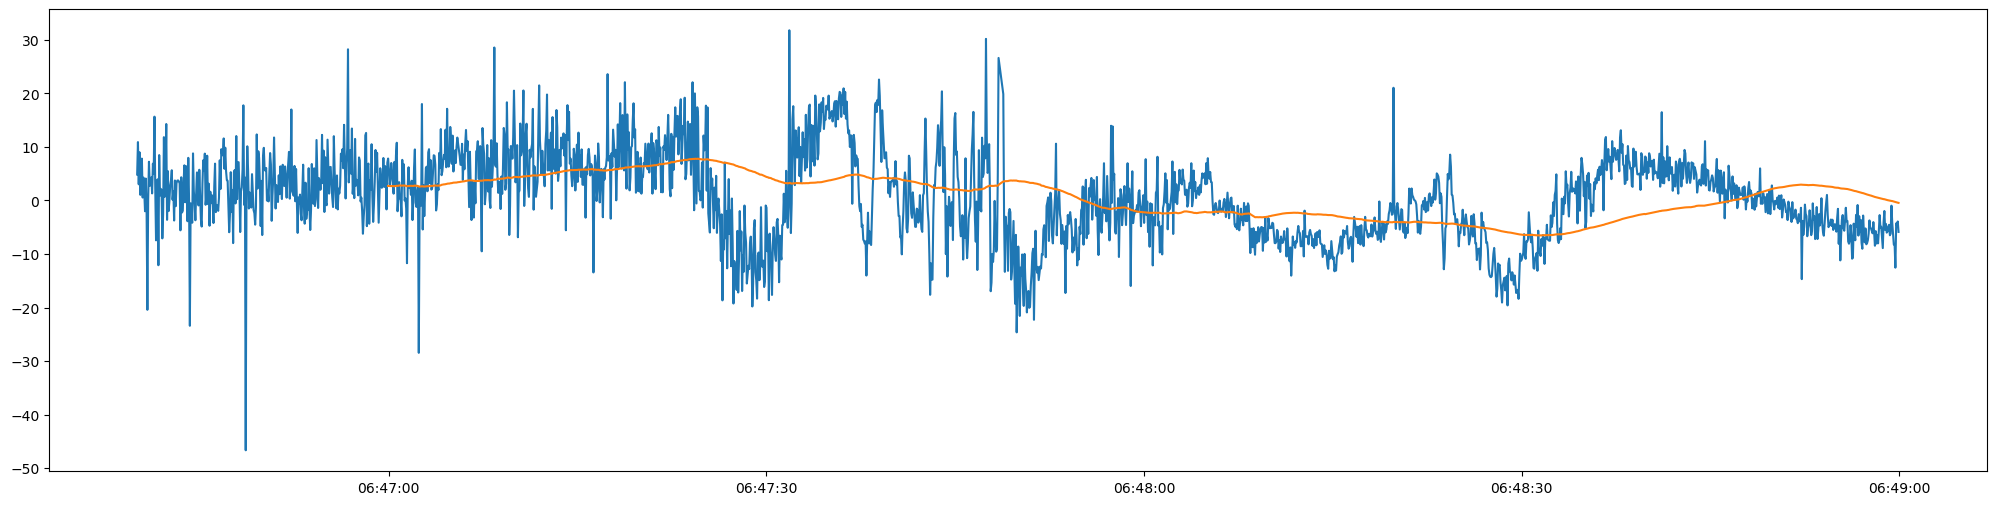

In [13]:
plt.figure()
plt.plot(E_interpolated.index, E_interpolated)
plt.plot(E_mov_ave.index, E_mov_ave)

## e, baselined

<Axes: xlabel='Timestamp'>

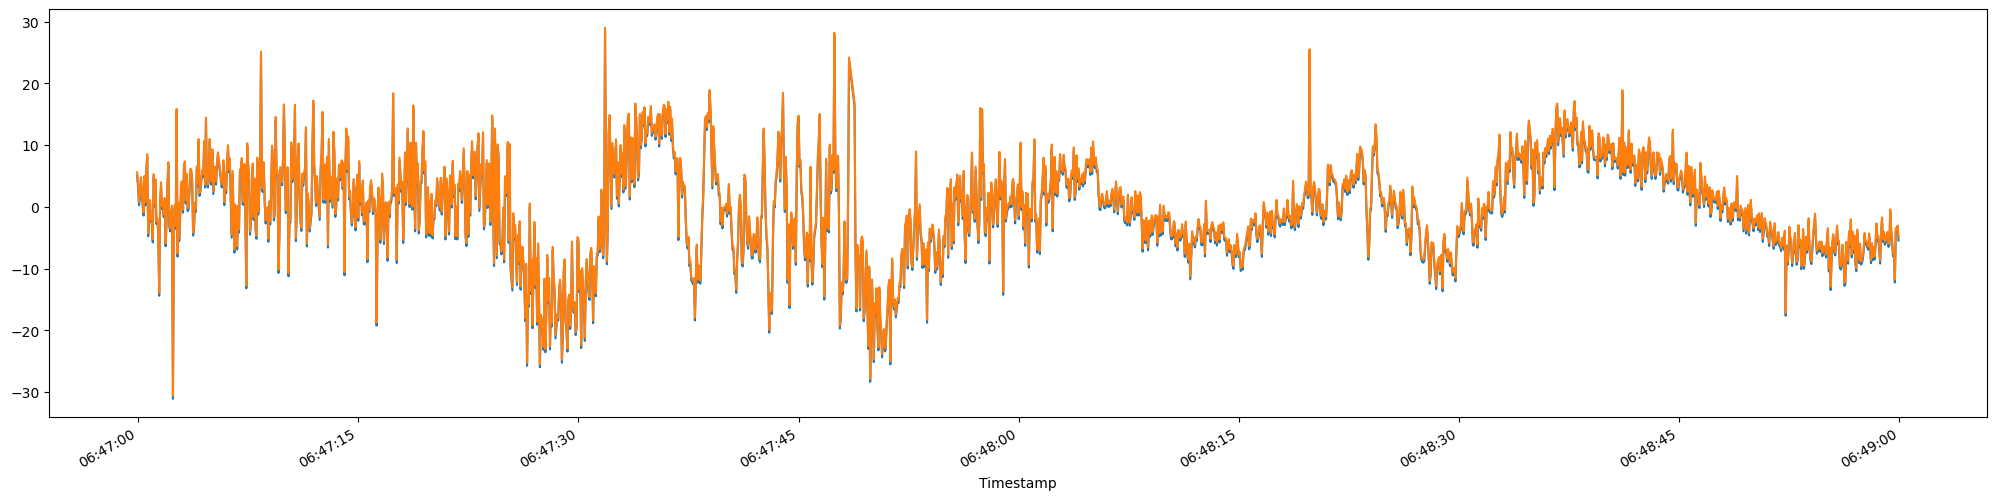

In [14]:
e = E_interpolated - E_mov_ave
e.plot()

e = e - e.mean()
# eN = eN.bfill()

e.plot()

In [15]:
# eN = eN - eN.mean()
# eN = eN - eN.iloc[0]

# eN.plot()

# e and b after baselined

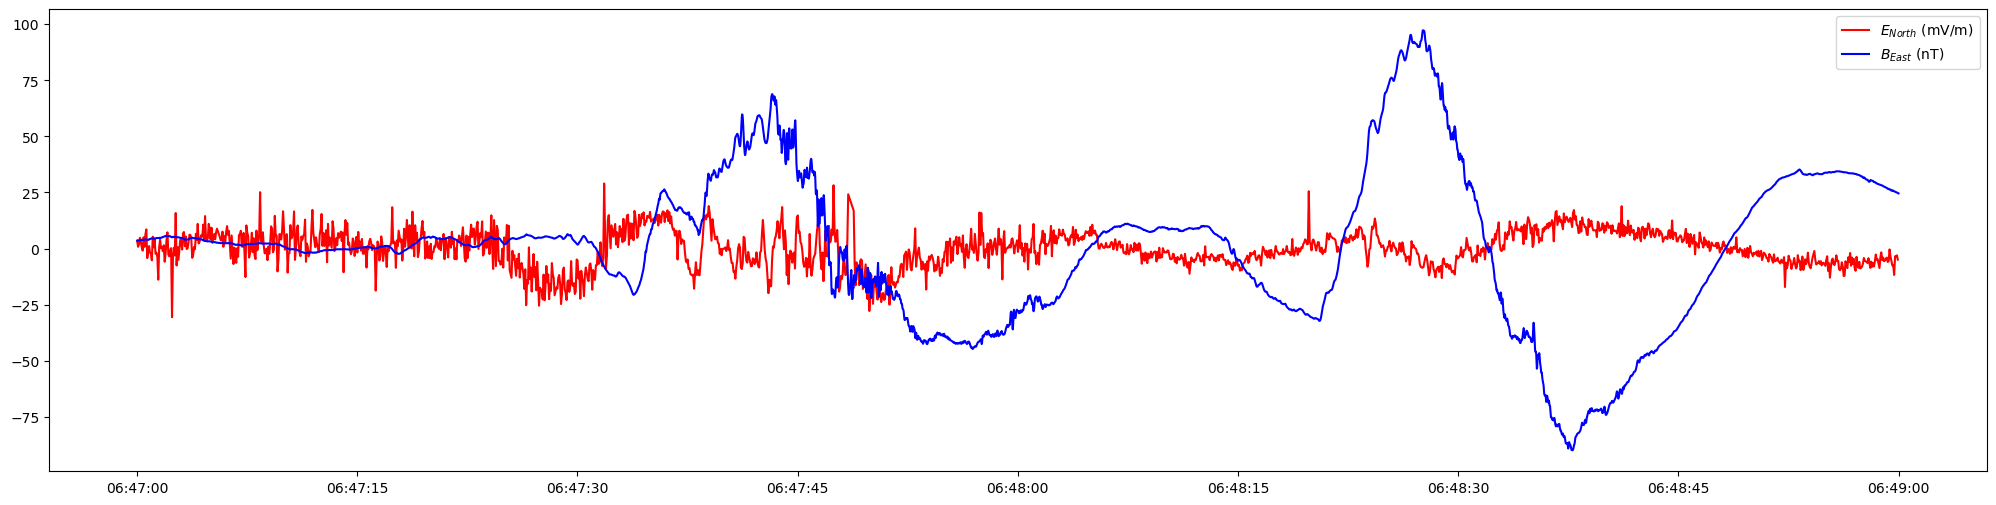

In [16]:
e = e['2016-03-11 06:47:00':]

plt.figure()
plt.plot(e.index, e, color='r', label=r'$E_{North}$ (mV/m)')
plt.plot(b.index, b, color='b', label=r'$B_{East}$ (nT)')
# plt.axvline(tl1[0], color='black', linestyle='--')
# plt.axvline(tl1[1], color='black', linestyle='--')
# plt.axvline(tl2[0], color='black', linestyle='--')
# plt.axvline(tl2[1], color='black', linestyle='--')
# plt.axvline(tl3[0],color='black', linestyle='--')
# plt.axvline(tl3[1],color='black', linestyle='--')
plt.legend()
plt.show()

# filter

In [17]:
# 1. 设计带通滤波器
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs  # 计算 Nyquist 频率
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype="band")
    return b, a

# 2. 应用带通滤波器
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# 设置滤波参数
lowcut = 0.2  # 带通滤波器下限频率
highcut = 4.0  # 带通滤波器上限频率

e_filter = bandpass_filter(e, lowcut, highcut, fs=fs_E, order=5)
e_filter = pd.Series(e_filter, index=e.index)
b_filter = bandpass_filter(b, lowcut, highcut, fs=fs_B, order=5)
b_filter = pd.Series(b_filter, index=b.index)

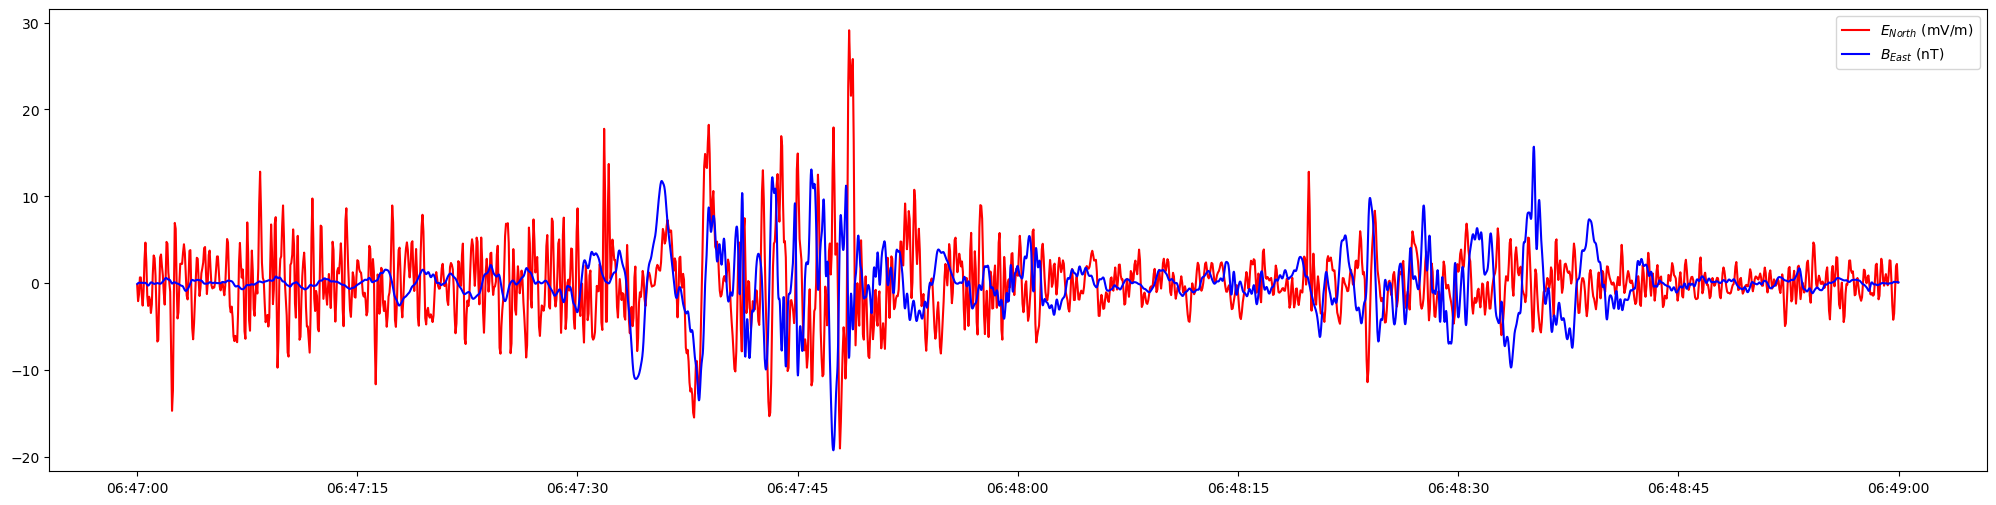

In [18]:
plt.figure()
plt.plot(e.index, e_filter, color='r', label=r'$E_{North}$ (mV/m)')
plt.plot(b.index, b_filter, color='b', label=r'$B_{East}$ (nT)')
plt.legend()
plt.show()

# select time range

In [19]:
e_2 = e_filter[tl6[0]:tl6[1]]
b_2 = b_filter[tl6[0]:tl6[1]]

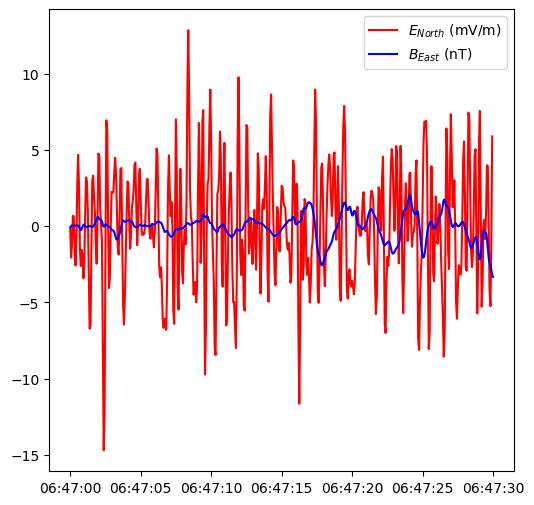

In [20]:
plt.figure(figsize=(6,6))
plt.plot(e_2.index, e_2, color='r', label=r'$E_{North}$ (mV/m)')
# plt.plot(e_2.index, e_2, color='r', label=r'$E_{east}$ (mV/m)')
plt.plot(b_2.index, b_2, color='b', label=r'$B_{East}$ (nT)')
# plt.plot(b_2.index, b_2, color='b', label=r'$B_{north}$ (nT)')
plt.legend()
plt.show()

# fre-amp

In [21]:
def fre_psd_amp(ndarray, sample_rate, nperseg, window='hammind'):
    frequencies, psd = welch(ndarray, fs=sample_rate, nperseg=nperseg, noverlap=nperseg/2, window=window)
    # 将 PSD 转换为振幅谱 (单边谱)
    amp = np.sqrt(2 * psd)
    # double
    # amp_spectrum = np.sqrt(len(ndarray) * psd)
    
    # # 绘制PSD和振幅谱的图像
    # plt.figure()
    # plt.subplot(2, 1, 1)
    # plt.semilogy(frequencies, psd)
    # plt.title("Power Spectral Density (PSD)")
    # plt.xlabel("Frequency (Hz)")
    # plt.ylabel("PSD (V^2/Hz)")
    # plt.grid()
    # 
    # plt.subplot(2, 1, 2)
    # plt.semilogy(frequencies, amp_spectrum)
    # plt.title("Amplitude Spectrum (Amp)")
    # plt.xlabel("Frequency (Hz)")
    # plt.ylabel("Amplitude (V)")
    # plt.grid()
    # 
    # plt.tight_layout()
    # plt.show()
    
    # 绘制频谱
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, amp)
    plt.xlim((0.2,8))
    plt.yscale('log')  # 幅值对数刻度
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power Spectral Density (V^2/Hz)")
    plt.title("Power Spectral Density (PSD) using Welch's method")
    plt.grid(which='both', linestyle='--', linewidth=0.5)
    plt.show()
    return frequencies, psd, amp
    # return frequencies, psd

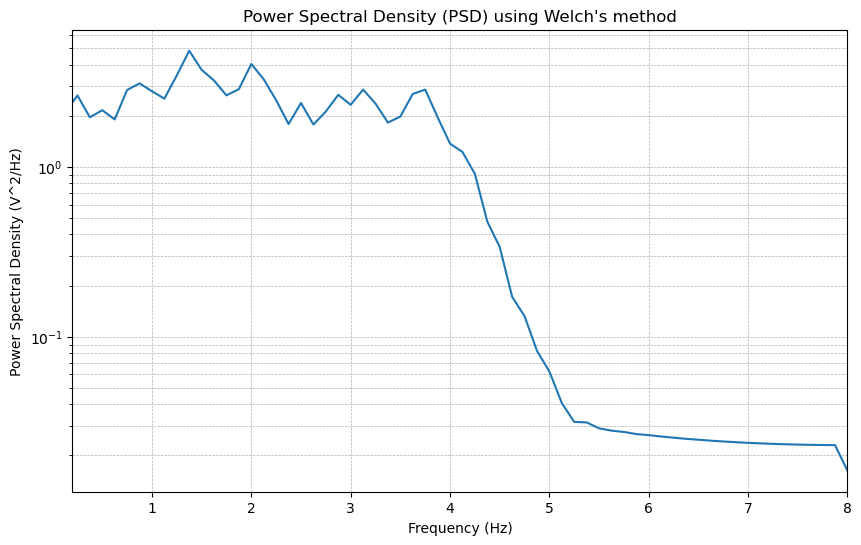

In [22]:
e_2_fre, e_2_psd, e_2_amp = fre_psd_amp(e_2, sample_rate=fs_E, nperseg=128, window='hamming')

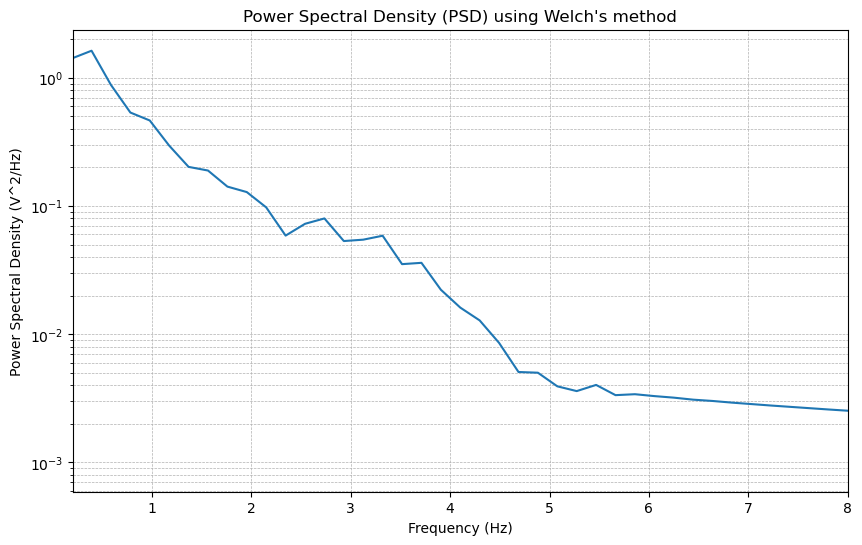

In [23]:
b_2_fre,b_2_psd,b_2_amp = fre_psd_amp(b_2, sample_rate=fs_B, nperseg=256, window='hamming')
# bE_2_fre,bE_2_psd, bE_2_amp_spectrum = fre_psd(bE_2, sample_rate=sample_rate_B,nperseg=512,window='hann')

In [24]:
# # 使用Welch方法估计功率谱密度 (PSD)
# frequencies, psd = welch(bE_2, fs=sample_rate_B, nperseg=512, noverlap=256, window='hann')
# 
# # 绘制频谱
# plt.figure(figsize=(10, 6))
# plt.plot(frequencies, psd)
# plt.xlim((0.2,8))
# plt.yscale('log')  # 幅值对数刻度
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Power Spectral Density (V^2/Hz)")
# plt.title("Power Spectral Density (PSD) using Welch's method")
# plt.grid(which='both', linestyle='--', linewidth=0.5)
# plt.show()

In [25]:
# # 使用 np.interp 插值 B_spectrum 到 f_E 的频率轴上
# bE_2_amp_inter = np.interp(eN_2_fre, bE_2_fre, bE_2_psd)

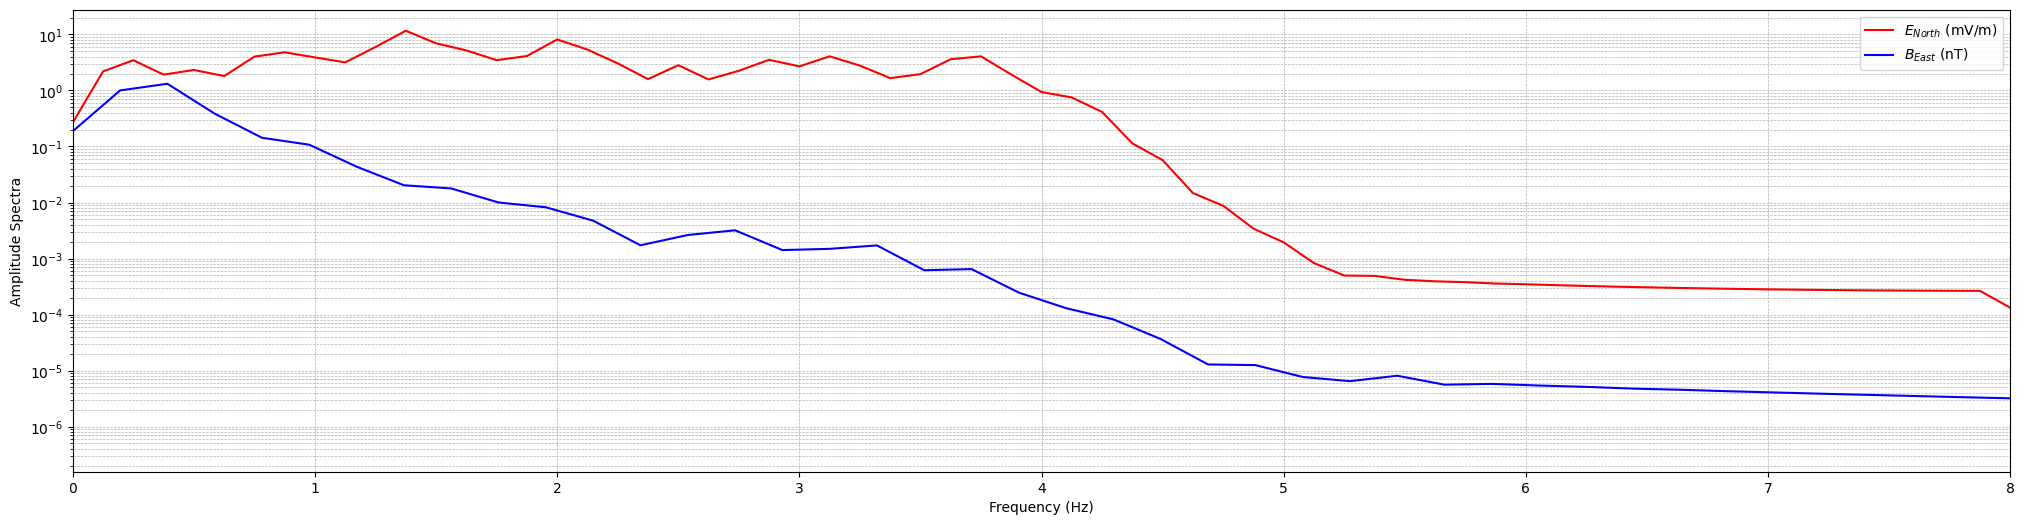

In [26]:
# 绘制频谱图
plt.figure()
plt.plot(e_2_fre, e_2_psd, color='r', label=r'$E_{North}$ (mV/m)')
plt.plot(b_2_fre, b_2_psd, color='b', label=r'$B_{East}$ (nT)')
plt.xscale('linear')  # 频率线性刻度
plt.yscale('log')  # 幅值对数刻度
plt.xlim((0,8))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude Spectra')
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()

# ratio

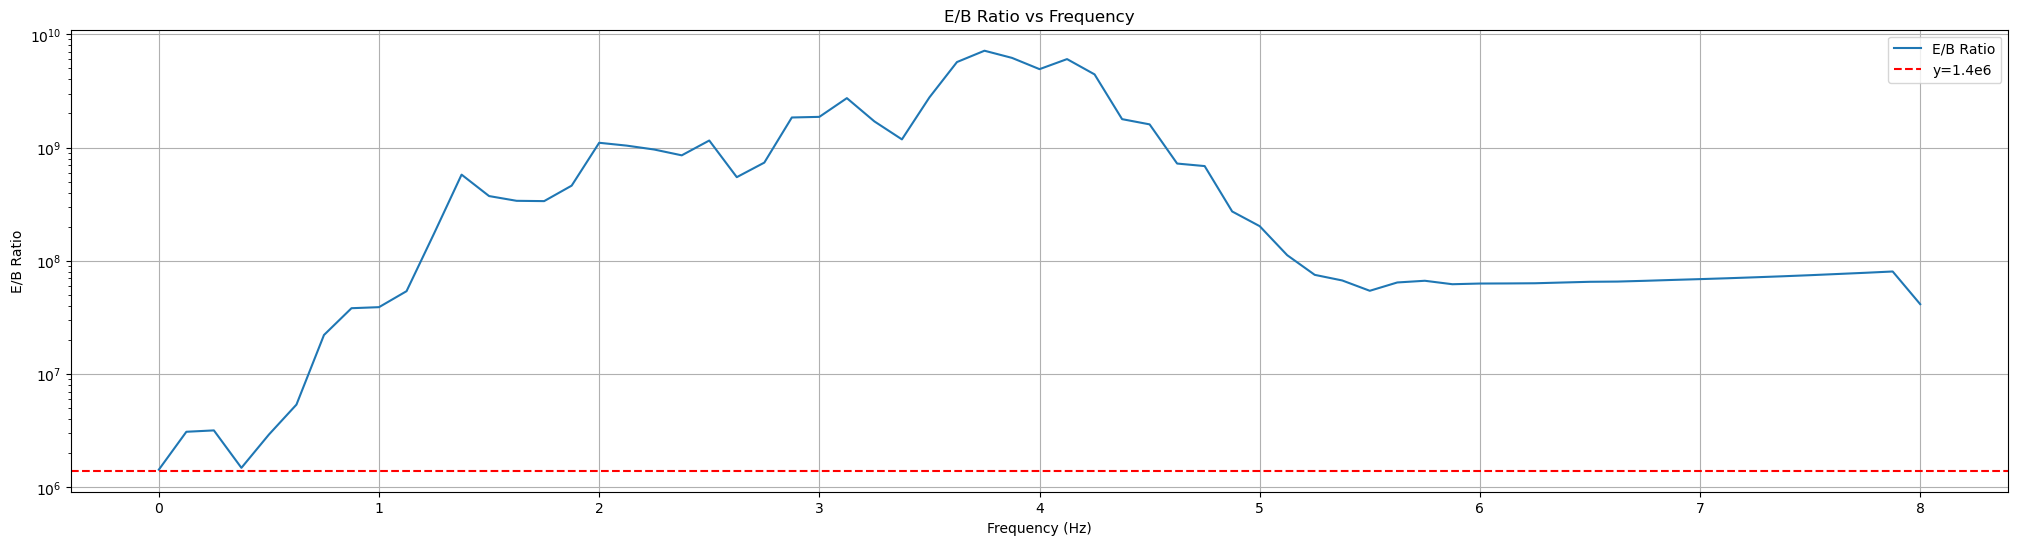

In [27]:
# 使用 np.interp 插值 B_spectrum 到 f_E 的频率轴上
b_2_psd_inter = np.interp(e_2_fre, b_2_fre, b_2_psd)

# 计算 E/B 的比值
ratio = (e_2_psd * 1e-3) / (b_2_psd_inter * 1e-9)

# 绘制频谱比值
plt.figure()
plt.plot(e_2_fre, ratio, label="E/B Ratio")
plt.axhline(y=1.4e6, color='red', linestyle='--', linewidth=1.5, label='y=1.4e6')
plt.xscale('linear')
plt.yscale('log')  # 如果需要对比值进行对数缩放
plt.xlabel("Frequency (Hz)")
plt.ylabel("E/B Ratio")
plt.title("E/B Ratio vs Frequency")
plt.grid(True)
plt.legend()
plt.show()


# 复现

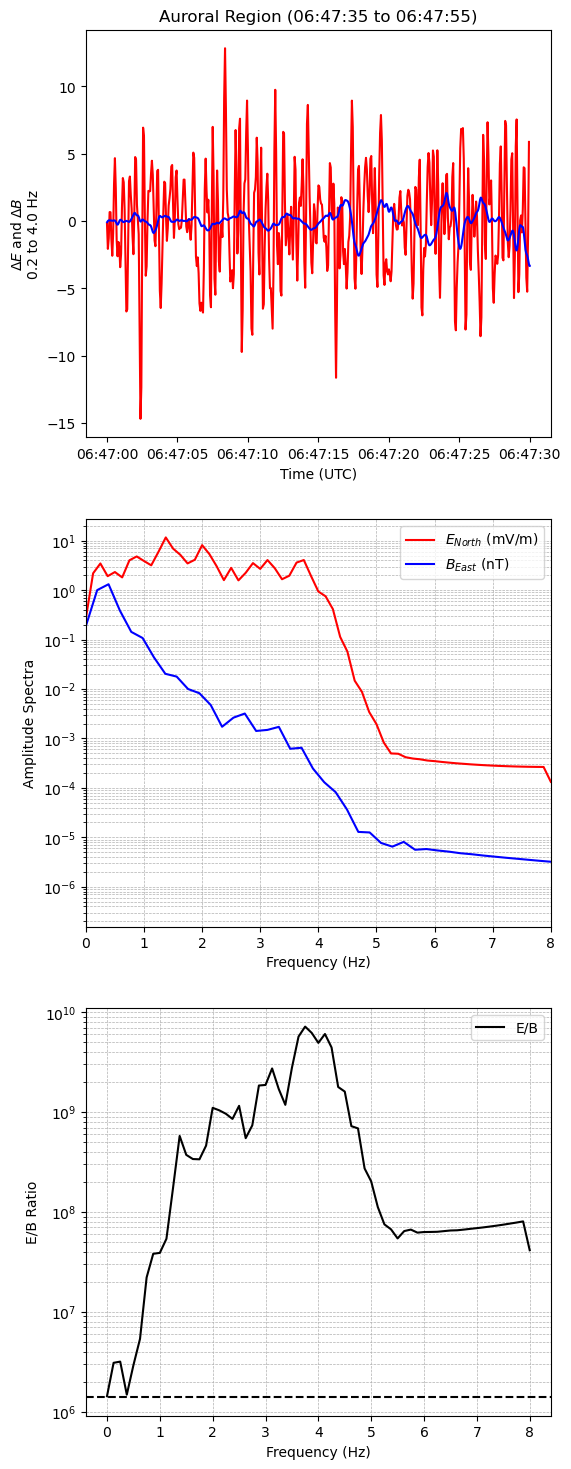

In [28]:
plt.figure(figsize = (6,18))

plt.subplot(311)
plt.plot(e_2.index, e_2, color='r', label=r'$E_{North}$ (mV/m)')
plt.plot(b_2.index, b_2, color='b', label=r'$B_{East}$ (nT)')
plt.title('Auroral Region (06:47:35 to 06:47:55)')
plt.xlabel('Time (UTC)')
plt.ylabel('$\\Delta E$ and $\\Delta B$ \n0.2 to 4.0 Hz')


plt.subplot(312)
plt.plot(e_2_fre, e_2_psd, color='r', label=r'$E_{North}$ (mV/m)')
plt.plot(b_2_fre, b_2_psd, color='b', label=r'$B_{East}$ (nT)')
# plt.xscale('linear')  # 频率线性刻度
plt.yscale('log')  # 幅值对数刻度
plt.xlim((0,8))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude Spectra')
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)

plt.subplot(313)
plt.plot(e_2_fre, ratio, color='black', label="E/B")
plt.axhline(y=1.4e6, color='black', linestyle='--', linewidth=1.5)
# plt.xscale('linear')
plt.yscale('log')  # 如果需要对比值进行对数缩放
plt.xlabel("Frequency (Hz)")
plt.ylabel("E/B Ratio")
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)

plt.show()